In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('C:/Users/User/OneDrive/Desktop/train.csv')
data.head

<bound method NDFrame.head of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pi

In [22]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) 

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [23]:
Y_train

array([0, 3, 5, ..., 3, 2, 1], dtype=int64)

In [32]:
def init_params():
    W1=np.random.rand(10,784)-0.5
    W2=np.random.rand(10,10)-0.5
    b1=np.random.rand(10,1)-0.5
    b2=np.random.rand(10,1)-0.5
    return W1,b1,W2,b2

def Relu(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1,b1,W2,b2,X):
    Z1=W1.dot(X)+b1
    A1=Relu(Z1)
    Z2=W2.dot(A1)+b2
    A2=softmax(Z2)
    return Z1,A1,Z2,A2

def Relu_deriv(Z):
    return Z>0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * Relu_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [33]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [36]:
W1, b1, W2, b2=gradient_descent(X_train,Y_train,0.10,5000)

Iteration:  0
[2 5 5 ... 3 5 5] [0 3 5 ... 3 2 1]
0.089
Iteration:  10
[2 5 8 ... 6 5 8] [0 3 5 ... 3 2 1]
0.178
Iteration:  20
[0 8 8 ... 3 5 8] [0 3 5 ... 3 2 1]
0.2976829268292683
Iteration:  30
[0 7 8 ... 3 5 1] [0 3 5 ... 3 2 1]
0.4121219512195122
Iteration:  40
[0 7 8 ... 3 3 1] [0 3 5 ... 3 2 1]
0.4880731707317073
Iteration:  50
[0 7 3 ... 3 3 1] [0 3 5 ... 3 2 1]
0.5431463414634147
Iteration:  60
[0 7 3 ... 3 3 1] [0 3 5 ... 3 2 1]
0.5838780487804878
Iteration:  70
[0 7 3 ... 3 3 1] [0 3 5 ... 3 2 1]
0.6131219512195122
Iteration:  80
[0 5 3 ... 3 3 1] [0 3 5 ... 3 2 1]
0.637219512195122
Iteration:  90
[0 5 3 ... 3 3 1] [0 3 5 ... 3 2 1]
0.6570975609756098
Iteration:  100
[0 5 3 ... 3 3 1] [0 3 5 ... 3 2 1]
0.6745121951219513
Iteration:  110
[0 5 3 ... 3 3 1] [0 3 5 ... 3 2 1]
0.6896585365853658
Iteration:  120
[0 5 3 ... 3 3 1] [0 3 5 ... 3 2 1]
0.7022682926829268
Iteration:  130
[0 5 3 ... 3 3 1] [0 3 5 ... 3 2 1]
0.7142926829268292
Iteration:  140
[0 5 3 ... 3 3 1] [0 3 5 ...

In [37]:
#hence an an accuracy of almost 93% is achieved on train set.

In [38]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


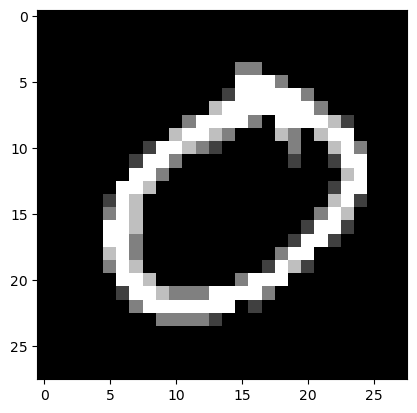

Prediction:  [7]
Label:  7


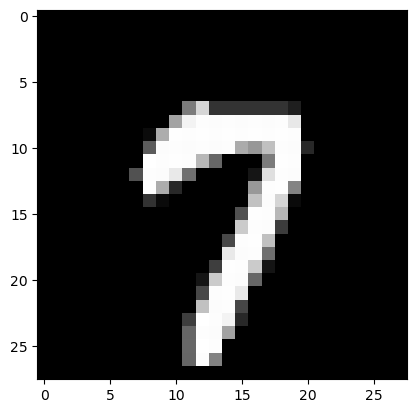

Prediction:  [3]
Label:  3


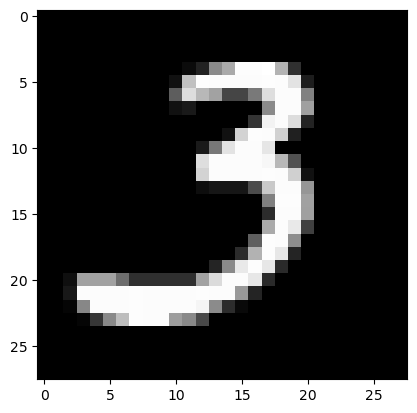

Prediction:  [5]
Label:  5


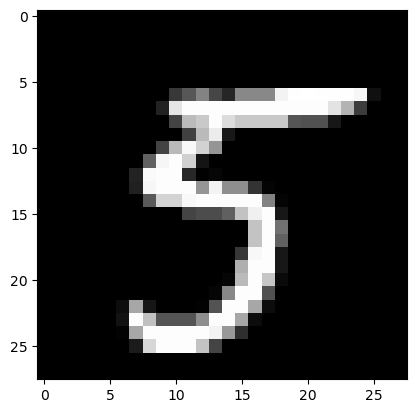

Prediction:  [0]
Label:  0


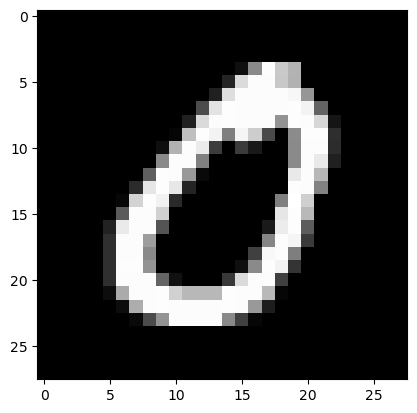

Prediction:  [0]
Label:  5


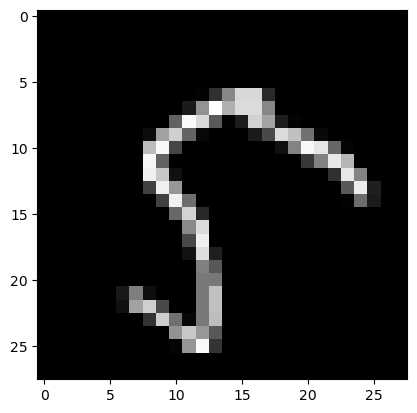

Prediction:  [6]
Label:  6


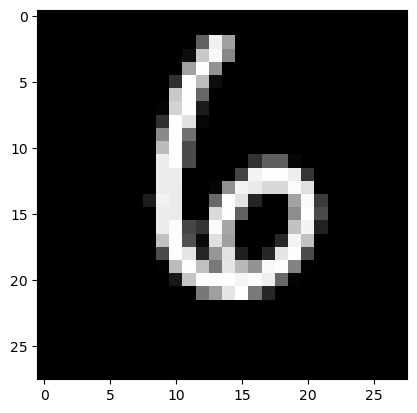

Prediction:  [2]
Label:  2


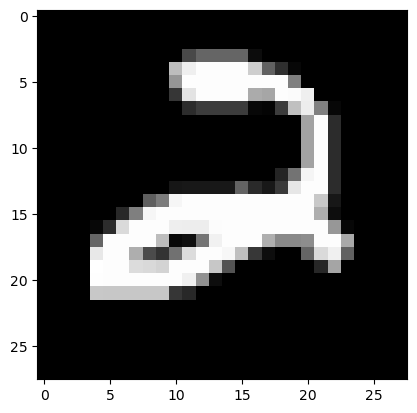

Prediction:  [7]
Label:  7


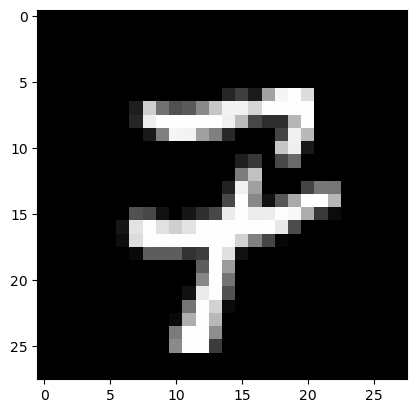

In [54]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(100, W1, b1, W2, b2)
test_prediction(150, W1, b1, W2, b2)
test_prediction(20, W1, b1, W2, b2)
test_prediction(142, W1, b1, W2, b2)
test_prediction(450, W1, b1, W2, b2)
test_prediction(12, W1, b1, W2, b2)
test_prediction(169, W1, b1, W2, b2)

In [55]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 1 4 1 7 1 7 6 2 6 1 3 4 5 9 2 7 0 4 0 0 2 9 5 0 1 6 7 6 1 0 5 9 1 2 0 0
 7 9 1 7 8 2 3 6 8 9 3 7 2 1 7 8 2 5 6 6 8 1 3 5 9 3 1 7 6 1 4 3 5 0 2 8 3
 5 2 3 0 7 3 4 2 0 9 9 8 5 2 3 2 4 0 7 2 4 9 4 3 4 0 5 0 6 2 5 7 6 4 6 0 3
 2 9 9 3 5 0 1 1 9 5 5 9 0 0 3 2 0 3 1 8 1 0 7 1 8 4 1 5 3 7 0 7 5 5 5 0 9
 8 5 6 2 9 1 1 2 1 7 2 0 8 8 4 6 0 4 6 7 4 1 3 2 5 1 9 3 5 1 4 0 6 3 0 8 7
 1 1 9 2 7 5 2 6 7 1 5 5 0 3 8 9 9 2 7 2 7 9 0 0 8 7 1 4 2 7 5 3 8 3 1 8 3
 7 0 2 6 1 1 2 6 7 5 2 9 1 9 4 1 3 9 0 4 7 0 6 4 5 4 0 5 6 2 1 1 4 7 6 1 6
 7 3 2 3 8 4 4 8 6 4 3 7 2 5 0 7 0 5 1 3 2 1 8 6 1 6 6 2 2 8 0 8 5 6 2 8 3
 1 6 2 8 7 6 5 0 5 0 8 0 0 8 4 0 5 7 4 4 3 9 4 6 3 1 6 1 7 5 0 5 9 8 2 0 2
 9 4 3 8 2 6 7 6 3 5 0 9 2 7 1 4 8 6 7 2 3 1 7 0 0 9 6 1 0 3 9 3 2 3 0 6 7
 8 3 9 6 2 4 4 3 8 7 2 6 1 9 8 3 3 4 3 3 8 0 8 3 6 1 7 8 2 7 1 4 2 8 6 5 1
 2 5 2 5 9 3 5 1 3 8 3 1 1 8 7 7 7 6 8 2 3 5 3 6 5 9 9 2 1 9 2 7 7 1 1 4 1
 2 7 3 3 6 5 8 7 6 4 1 5 1 3 6 2 2 9 2 9 2 0 7 7 0 1 5 9 9 0 4 1 4 9 1 6 2
 0 5 6 6 7 5 5 0 5 0 6 3 

0.908

In [ ]:
#an accuracy of almost 91% is achieved on dev set or validation set.